In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
GENRES = ["classical", "country", "edm", "hip-hop", "jazz", "pop", "rap", "rnb", "rock"]

In [36]:
all_tracks_df = pd.DataFrame()
for genre in GENRES:
    genre_df = pd.read_pickle(f"../data_deprecated/spotify_dataset_{genre}.pkl")
    all_tracks_df = pd.concat([all_tracks_df, genre_df])

all_tracks_df.drop("popularity", axis=1, inplace=True)
all_tracks_df

,artists,name,genre,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1upQiytDIEZfl9ItruoXuC,"[George Frideric Handel, Alexander Briger, Aca...",Handel / Orch. Hale: Keyboard Suite No. 4 in D...,classical,2002,0.0939,0.03360,2,-24.041,0,0.0606,0.927000,0.830000,0.0954,0.0516,67.359,207267,3
5bu9A6uphPWg39RC3ZKeku,"[Johann Sebastian Bach, Glenn Gould]","Goldberg Variations, BWV 988: Aria",classical,1981,0.4540,0.01390,4,-29.966,0,0.0514,0.995000,0.943000,0.0736,0.2440,130.253,184853,4
1Oo7XEqkrwifJn17aA0ocF,"[Johannes Brahms, Arcadi Volodos]","Sechs Klavierstücke, Op. 118: II. Intermezzo i...",classical,2017,0.2990,0.00626,9,-30.923,1,0.0478,0.994000,0.901000,0.0823,0.0634,69.043,378733,4
3DNRdudZ2SstnDCVKFdXxG,"[Ludwig van Beethoven, Paul Lewis]","Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",classical,2007,0.1840,0.00527,1,-37.264,0,0.0432,0.995000,0.887000,0.1730,0.1510,170.612,315427,3
67TCAXIe154ZGDNaWceqxC,"[Franz Joseph Haydn, Kodály Quartet]","String Quartet No. 62 in C Major, Op. 76, No. ...",classical,1988,0.1590,0.04010,7,-27.516,1,0.0446,0.984000,0.760000,0.1560,0.1060,106.239,462627,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6Qb7gtV6Q4MnUjSbkFcopl,[Paul Simon],50 Ways to Leave Your Lover,rock,1975,0.8150,0.37200,7,-12.814,1,0.0752,0.166000,0.000116,0.0767,0.2930,101.684,217347,4
0y5a9zXjz7NSEkRCPKNZwP,[The Last Shadow Puppets],My Mistakes Were Made For You,rock,2008,0.4450,0.91300,2,-4.789,0,0.0434,0.028500,0.000000,0.3760,0.7640,97.620,184547,4
0Q2dRzhPWFOex89dOjbq5Y,[Frank Zappa],Watermelon In Easter Hay,rock,1979,0.4860,0.43300,9,-13.210,1,0.0439,0.192000,0.031000,0.1240,0.2950,110.936,547960,4
5eMjcHVRRh1tbimTgJPoGn,[Jackson Browne],Stay - 2018 Remaster,rock,1977,0.6030,0.76500,7,-8.265,1,0.0275,0.097400,0.296000,0.1100,0.7200,107.068,204464,4


<AxesSubplot:ylabel='genre'>

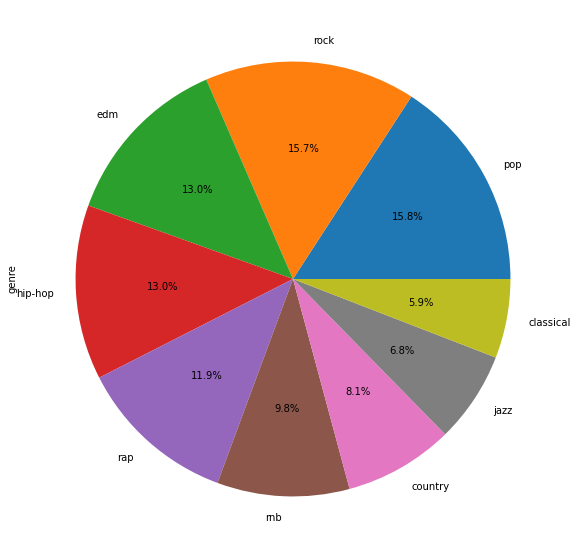

In [43]:
all_tracks_df['genre'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10))

<AxesSubplot:>

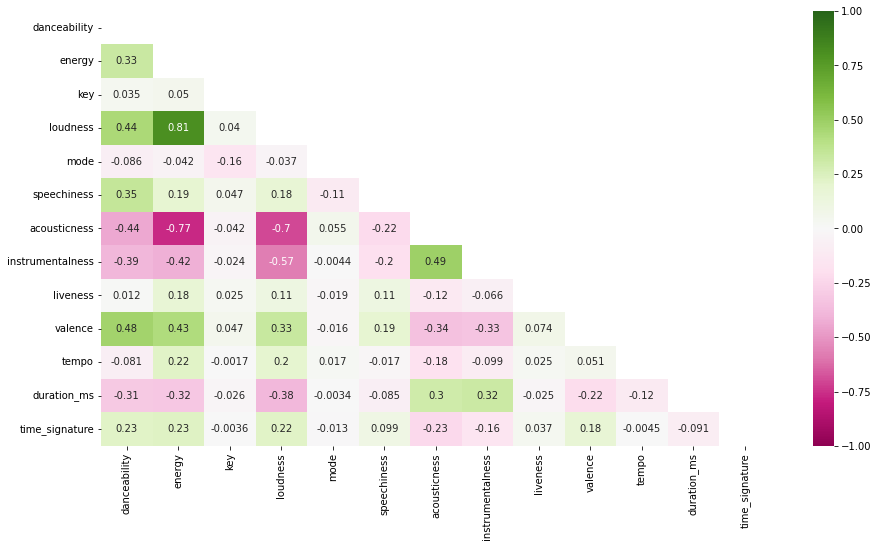

In [40]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(all_tracks_df.corr(), dtype=bool))
sns.heatmap(all_tracks_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="PiYG")